In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn import cross_validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
import xgboost

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.chdir(r"C:\Users\Dell\Desktop\Finalproject")

In [3]:
train = pd.read_csv("train_loan.csv")

In [5]:
test = pd.read_csv("test_loan.csv")

In [6]:
#splitting
y_train = np.array(train['default_ind'])  
y_test = np.array(test['default_ind'])
X_train = train.drop('default_ind', axis = 1)  
X_train = np.array(X_train)
X_test = test.drop('default_ind', axis = 1)
X_test = np.array(X_test)

In [7]:
# normalizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

In [8]:
scaler=StandardScaler()
scaler.fit(X_test)
X_test=scaler.transform(X_test)

In [9]:
scaler=StandardScaler()
scaler.fit(X_test)
X_test=scaler.transform(X_test)

In [10]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [11]:
#logistic regression

In [12]:
# applying logistic model
from sklearn.linear_model import LogisticRegression

classifier=(LogisticRegression())
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
Y_pred=classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
print("Classification report :")
print(classification_report(y_test,Y_pred))
accuracy_score=accuracy_score(y_test,Y_pred)
print("Accuracy of the model:",accuracy_score)
#auc curve 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred)
auc(false_positive_rate, true_positive_rate)

[[7986   62]
 [ 237   12]]
Classification report :
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      8048
          1       0.16      0.05      0.07       249

avg / total       0.95      0.96      0.95      8297

Accuracy of the model: 0.963962878149


0.52024449687417662

In [15]:
#%% Adjusting threshold
#store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[ 0.89190304  0.10809696]
 [ 0.86826309  0.13173691]
 [ 0.85706428  0.14293572]
 ..., 
 [ 0.77845276  0.22154724]
 [ 0.64711795  0.35288205]
 [ 0.88380364  0.11619636]]


In [20]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value < 0.495:
        y_pred_class.append(0)
    else:
        y_pred_class.append(1)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cfm=confusion_matrix(y_test.tolist(),y_pred_class)
print(cfm)
accuracy_score=accuracy_score(y_test.tolist(),y_pred_class)
print("Accuracy of the model: ",accuracy_score)
print("Classification report :")
print(classification_report(y_test,y_pred_class))
#auc curve 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_class)
auc(false_positive_rate, true_positive_rate)

[[7983   65]
 [ 237   12]]
Accuracy of the model:  0.963601301675
Classification report :
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      8048
          1       0.16      0.05      0.07       249

avg / total       0.95      0.96      0.95      8297



0.52005811516443501

In [ ]:
#decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
Y_pred=model_DecisionTree.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
cfm=confusion_matrix(y_test.tolist(),Y_pred)
print(cfm)
accuracy_score=accuracy_score(y_test.tolist(),Y_pred)
print("Accuracy of the model: ",accuracy_score)
print("Classification report :")
print(classification_report(y_test,Y_pred))
#auc curve 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred)
auc(false_positive_rate, true_positive_rate)

[[6447 1601]
 [ 188   61]]
Accuracy of the model:  0.784379896348
Classification report :
             precision    recall  f1-score   support

          0       0.97      0.80      0.88      8048
          1       0.04      0.24      0.06       249

avg / total       0.94      0.78      0.85      8297



0.52302425407394981

In [25]:
#Xgboost

In [26]:
#using xgboost
import xgboost

In [27]:
from xgboost import XGBRegressor
my_model = XGBRegressor(learning_rate =0.09,subsample=0.5,colsample_bytree=0.85,reg_alpha=0.005,min_child_weight = 5)

In [28]:
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0, learning_rate=0.09,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.5)

In [29]:
test_y_pred = my_model.predict(X_test)
auc = roc_auc_score(y_test, test_y_pred)
print("Performance  test : ", auc)

Performance  test :  0.669891793815


In [30]:
test_y_pred = my_model.predict(X_test)
auc = roc_auc_score(y_test, test_y_pred)
print("Performance  test : ", auc)

Performance  test :  0.669891793815


In [31]:
fpr, tpr, threshold = metrics.roc_curve(y_test, test_y_pred)
roc_auc = metrics.auc(fpr, tpr)

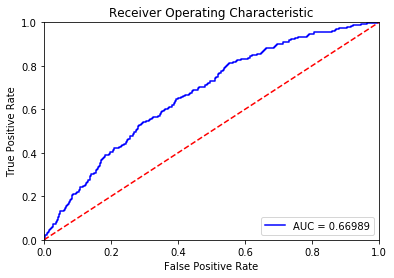

In [32]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()